## Introduction
Many retail brands turn towards detailed market basket analysis to identify association between items, Using this valuable insights, they're able to come up ith various strategies to improve theire revenue and customer experience.

- Associated products are placed close to each other encouraging  buyers of one item to buy the other.

- Discounts can be applied to only one of the associated products

### Association Rule Mining
How exactly is Market Basket Analysis carried out?
- **Association Rule Mining** : rule based machine learning method that helps to uncover meaningful correlations between different products according to their co-occurence in a data set.

### Core Measures of Association Rule Mining
- **Support** : probability of an event to occur.
- **Confidence** : probability of event A happening given that event B has already happened, i.e.,the probability of an item being purchased when another item is already in the basket.
- **Lift** : observed to expected ratio i.e., it measures how likely an item is purchased when another item is purchased, while controlling for how popular both items are.

### Apriori Algorithm
Identifies the items in a data set and further extends them to larger and larger item sets.

- Only extends if the item sets are frequent, i.e., the probability of hte itemset is beyond a certain pre-determined threshold
    - The probability of an itemset is not frequent if:
        - P(I) < minimum support threshold, where I is any non-empty itemset
        - Any subset within the itemset has value less than minimum support
- Anti-monotone property

### Steps in Apriori Algorithm
- Generate an itemset through join step i.e., generate (i + 1) itemset from i-itemsets.
- Prune Step i.e., remove any candidate item set that does not meet the minimum support requirement.

### Import & Read Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [38]:
basket = pd.read_csv("/Users/jessica/Desktop/Groceries_dataset.csv")

In [39]:
display(basket.head())

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Data Transformation
- Basket dataset records individual item purchases in a row, best idea is to group those purchases into basket of items.
- In next step, encoding transactions using <i>TransactionEncoder</i> into a formet that is suitable for the Apriori function.

In [40]:
transactions = [i[1]['itemDescription'].tolist() for i in list(basket.groupby(['Member_number','Date']))]

In [41]:
display(len(transactions))

14963

In [42]:
encoder = TransactionEncoder()
encoded_array = encoder.fit(transactions).transform(transactions)

In [45]:
transactions = pd.DataFrame(encoded_array, columns=encoder.columns_)
transactions.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


> Note : The data frame records each row as a transaction, and the items that were purchased in the transaction will be recorded as True.

### Apriori & Association Rules
- The **Apriori** algorithm will be used to generate frequent item sets
    - Minimum Support : 6 out of total transactions
    - Filter Lift value > 1.5

In [47]:
frequent_itemsets = apriori(transactions, min_support=6/len(basket),
                            use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="lift",
                          min_threshold=1.5)
display(rules.head())
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(whipped/sour cream),0.004010,0.043708,0.000267,0.066667,1.525280,0.000092,1.024599
1,(whipped/sour cream),(Instant food products),0.043708,0.004010,0.000267,0.006116,1.525280,0.000092,1.002119
2,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289
3,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854
4,(UHT-milk),(candles),0.021386,0.004411,0.000200,0.009375,2.125426,0.000106,1.005011


Rules identified:  768


### Visualizations
- Rules that are closer to top right are the rules that can be the most meaningful to be further dived in.

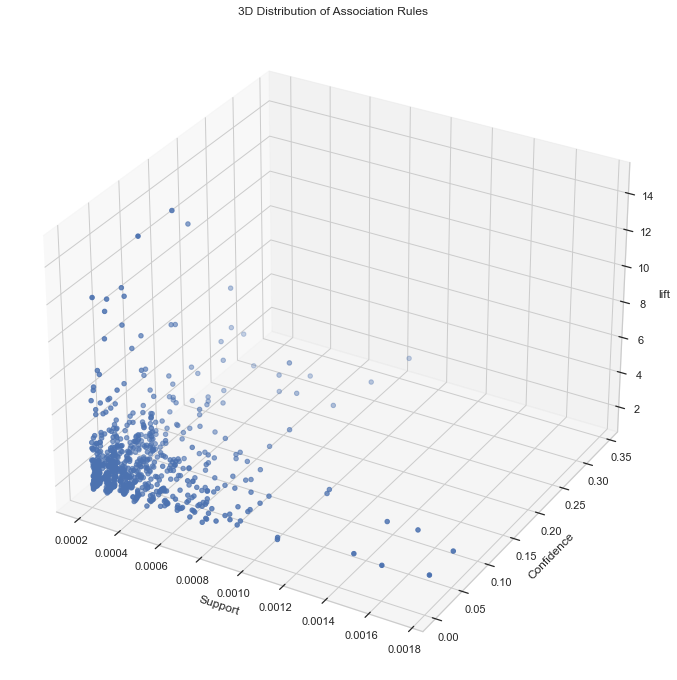

In [49]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection ='3d')

x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")

ax.scatter(x,y,z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

Another type of visualizaiton to look at the relationship between products via Network Graph.

<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
/var/folders/t6/qbm3gwsd3vgcgyyndxlh_h1w0000gn/T/ipykernel_32836/3680248427.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


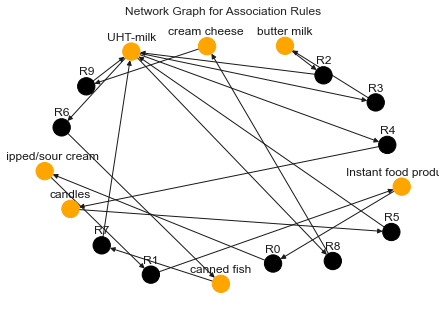

In [51]:
def draw_network(rules, rules_to_show):
  # Directional Graph from NetworkX
  network = nx.DiGraph()
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

### Business Application
For instance, the grocery store has bought up too much Whole Milk and is now worried that the stocks will expire if they cannot be sold out in time. The profit margin of Whole Milk is so low that they cannot afford to have a promotional discount without killing too much of their profits.

One approach could be to find out which products drive the sales of Whole Milk and offer discounts on those products.

In [52]:
milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(milk_rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523
2,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
3,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868


The grocery store can apply a promotional discount on Brandy, Softener, Canned Fruit, Syrup and Artificial Sweetener. Some of the associations may seem counter-intuitive, but the rules state that these products do drive the sales of Whole Milk.

### Conclusion
Apriori algorithm and association measures can help businesses derive data-driven strategies to boost their revenues and profits. These associaion rules are critical in data minining for analyzing customer's purchasing behavior.